In [1]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
cnn = load_model('food_grading')
size = (120,120)

In [3]:
def mask(image):
    
    masking = np.zeros(image.shape[:2], dtype="uint8")
    cv2.circle(masking, (60, 60), 50, 255, -1)
    masked = cv2.bitwise_and(image, image, mask=masking)
    
    return masked

In [4]:
classes = {'Apple': 0, 'Banana': 1, 'Guava': 2}
print(classes)
d = dict()
for i in classes.keys():
    d[classes[i]] = i
print(d)
def testModel(path):
    
    #Reading the image
    test_image = cv2.imread(path)
    test_image = cv2.resize(test_image, size, interpolation = cv2.INTER_AREA)
    
    # Converting to rgb
    test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    print("Original Image: ")
    plt.imshow(test_image)
    plt.show()
    
    #Scaling
    test_image = cv2.resize(test_image, size, interpolation = cv2.INTER_AREA)
    print("Scaled Image: ")
    plt.imshow(test_image)
    plt.show()
    
    #Mask
    test_image = mask(test_image)
    print("Masked Image: ")
    plt.imshow(test_image)
    plt.show()
    
    # Normalize
    test_image = test_image.astype('float32')/255.0
    print("Normalized Image: ")
    plt.imshow(test_image)
    plt.show()
    
    prediction = cnn.predict(np.array([test_image]))
    result = np.argmax(prediction)
    print(result)
    print(d[result])

{'Apple': 0, 'Banana': 1, 'Guava': 2}
{0: 'Apple', 1: 'Banana', 2: 'Guava'}


Original Image: 


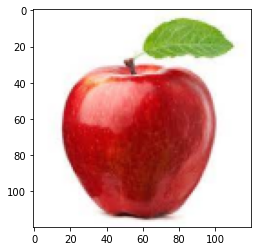

Scaled Image: 


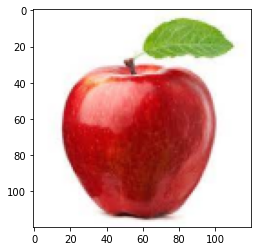

Masked Image: 


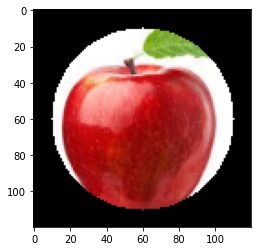

Normalized Image: 


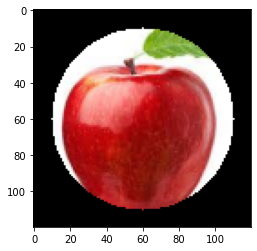

0
Apple


In [5]:
testModel('dataset/single_pred/apple_or_banana1.jfif')

Original Image: 


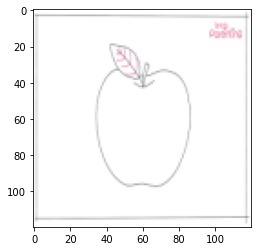

Scaled Image: 


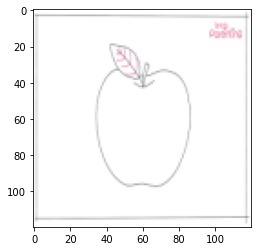

Masked Image: 


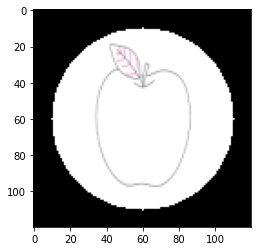

Normalized Image: 


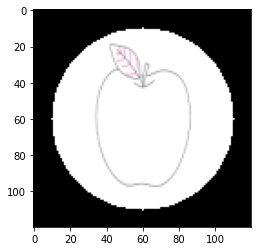

2
Guava


In [6]:
testModel('dataset/single_pred/apple_or_banana2.png')

Original Image: 


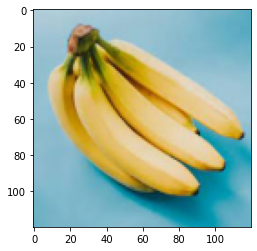

Scaled Image: 


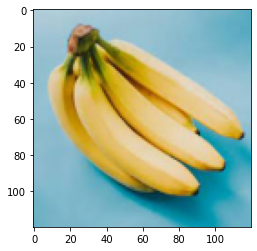

Masked Image: 


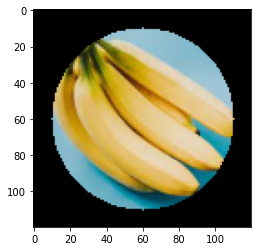

Normalized Image: 


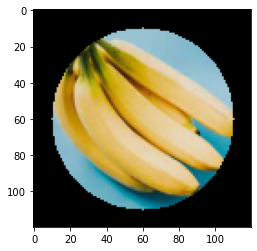

2
Guava


In [7]:
testModel('dataset/single_pred/apple_or_banana3.jfif')

Original Image: 


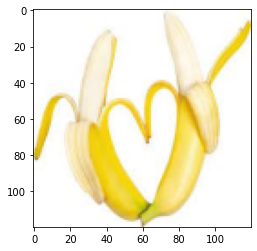

Scaled Image: 


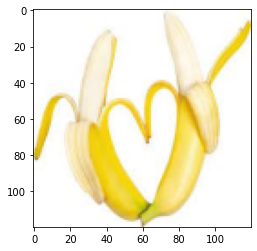

Masked Image: 


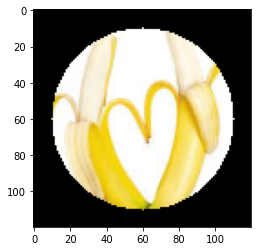

Normalized Image: 


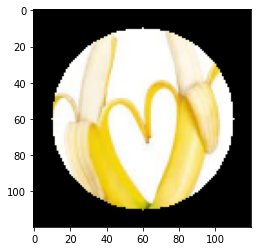

1
Banana


In [8]:
testModel('dataset/single_pred/apple_or_banana4.jfif')

Original Image: 


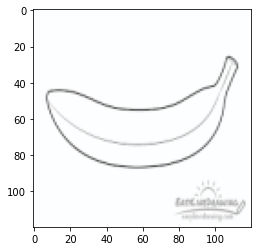

Scaled Image: 


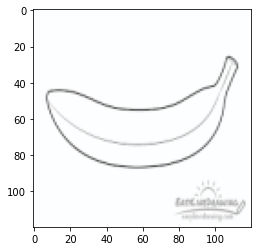

Masked Image: 


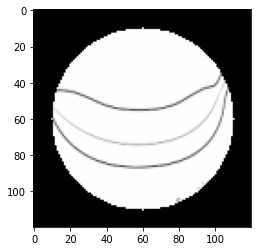

Normalized Image: 


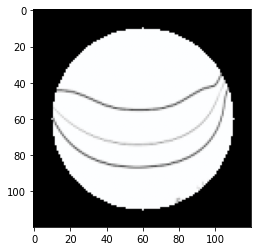

2
Guava


In [9]:
testModel('dataset/single_pred/apple_or_banana5.png')

Original Image: 


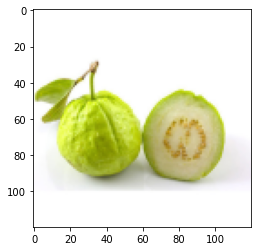

Scaled Image: 


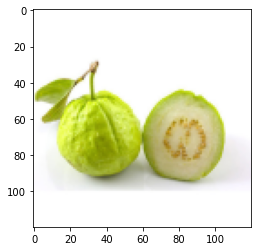

Masked Image: 


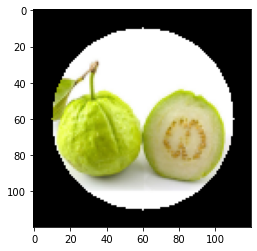

Normalized Image: 


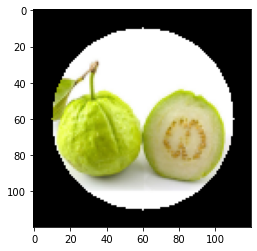

2
Guava


In [10]:
testModel('dataset/single_pred/apple_or_banana6.jpg')

Original Image: 


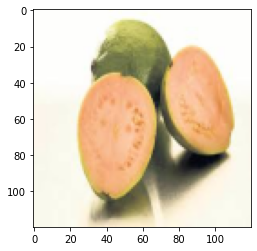

Scaled Image: 


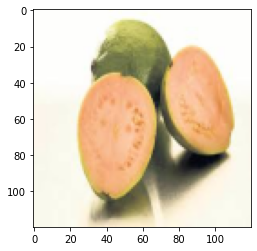

Masked Image: 


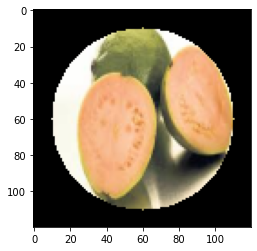

Normalized Image: 


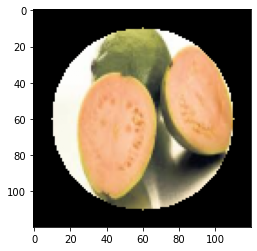

2
Guava


In [11]:
testModel('dataset/single_pred/apple_or_banana7.jfif')

Original Image: 


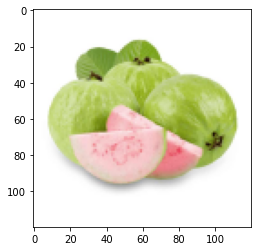

Scaled Image: 


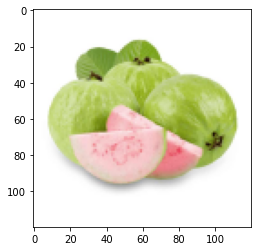

Masked Image: 


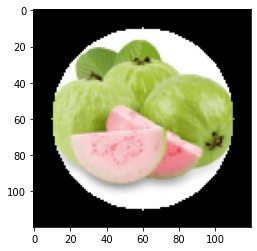

Normalized Image: 


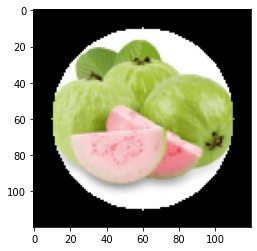

2
Guava


In [12]:
testModel('dataset/single_pred/apple_or_banana8.png')